In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

In [3]:
import os
from micdrop.utils.git_utils import get_git_root
from micdrop.src.preprocessing.run_preprocessing import load_raw_data

In [4]:
git_root = get_git_root(os.getcwd())
data_path = f"{git_root}/data/raw/micdrop_subsciptions_data_v1.csv"

In [5]:
# Approx 50% urban, non-urban split (is non-urban suburban or rural? feels mostly suburban here when checking distributions of a few of the larger cities)
# Some cities appear entirely urban (st louis, philadelphia, st petersburg, west park, nashville) -> how much do we trust the urban / non-urban split?
# Approx 2% with credit card on file
# Approx 30% students (younger)
# Favorite genre heavily skewed to hip_hop -> was this a campaign targeting hiphop listeners?
# Nationwide (US only) with a few states more heavily represented (by population?) -> seems to be miami area, los angeles area, hawaii, and scattered other big cities. 
# Somewhat messy. Would be nice to have a zipcode (for urban / non-urban) or metro area field (lax vs los angeles, miami vs miami beach, atl vs atlanta)
# Big long tail of other cities
# 70% towards mobile, 30% towards desktop
# Click to subscribe rate is 7%, which is pretty good.


# Interesting that the data uses the holiday period (christmas + new years). May not be 100% representative of the rest of the year.
# Ex: people are more likely to NOT be at their home address at this time. So ad effectiveness likely also needs an approx location of device
# and then create an "is_near_home" feature

# Other demographics probably important: age, income

In [9]:
df.pivot_table(index="customer_city", columns="urban_flag", values="subscriber", aggfunc="count").reset_index().sort_values(by=1, ascending=False)

urban_flag,customer_city,0,1
610,saint petersburg,6.0,4742.0
608,saint louis,NaN,3359.0
432,miami,2610.0,2565.0
547,philadelphia,20.0,1991.0
395,los angeles,5259.0,1684.0
303,honolulu,2979.0,1487.0
368,las vegas,2209.0,1429.0
568,portland,1538.0,1328.0
115,chicago,603.0,1291.0
305,houston,1283.0,1213.0


In [10]:
def calc_click_to_subscribe_ratio(df, group_col, plot=False):
    df_grp = df.groupby(group_col)['subscriber'].mean()
    if plot:
        df_grp.plot.bar()
        
    return df_grp

student
0    0.072848
1    0.070288
Name: subscriber, dtype: float64

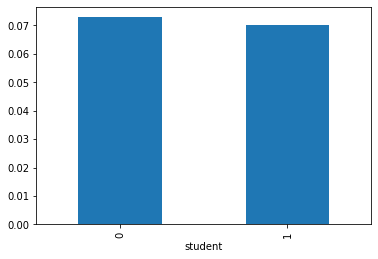

In [11]:
# Student status overall does not affect conversion rates
calc_click_to_subscribe_ratio(df, 'student', plot=True)

fav_genre
classical     0.051576
country       0.050251
hip_hop       0.072628
indie_rock    0.035567
latin         0.036727
punk_rock     0.054755
r&b           0.056029
techno        0.069284
Name: subscriber, dtype: float64

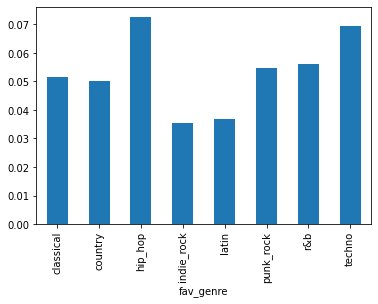

In [12]:
calc_click_to_subscribe_ratio(df, 'fav_genre', plot=True)

# For people who are correctly targeted (hip hop ads when hip hop is favorite genre) -> conversion is pretty good
# Build targeted ads based on people's preferred genres

credit_card_on_file
0    0.070835
1    0.127520
Name: subscriber, dtype: float64

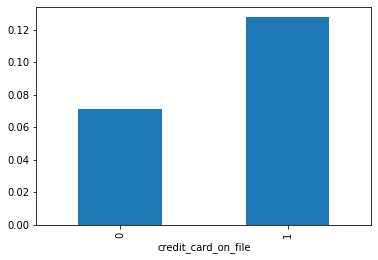

In [13]:
calc_click_to_subscribe_ratio(df, 'credit_card_on_file', plot=True)

# Conversion rate is significantly above average if credit card info already stored (existing customer, easy payment method)

day_of_week
Friday       0.072810
Monday       0.066376
Saturday     0.073364
Sunday       0.073008
Thursday     0.072879
Tuesday      0.072413
Wednesday    0.072658
Name: subscriber, dtype: float64

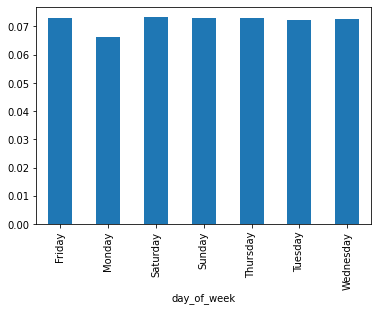

In [14]:
calc_click_to_subscribe_ratio(df, 'day_of_week', plot=True)

# Conversion rate does not depend significantly on day of week, though Monday is somewhat lower. 

is_new_years
0    0.072324
1    0.064464
Name: subscriber, dtype: float64

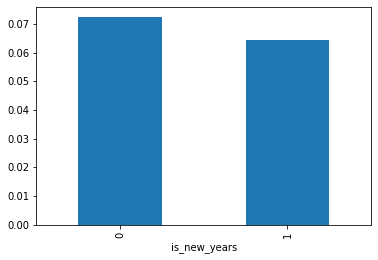

In [15]:
# Conversion rate is below average on holidays (Christmas, New Years). User behavior different on average day vs holiday
calc_click_to_subscribe_ratio(df, 'is_new_years', plot=True)

In [17]:
Y_VAR = ["subscriber"]
CATEGORICAL_COLS = ['platform', 'customer_state', 'fav_genre', 'day_of_week', 'city_adj']
NUMERIC_COLS = ['urban_flag', 'credit_card_on_file', 'student', 'is_holiday']

data_dummy = pd.get_dummies(df[Y_VAR + CATEGORICAL_COLS + NUMERIC_COLS], drop_first=True)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(12345)

#split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.33)

# build model
clf = RandomForestClassifier(n_estimators = 100, max_features=3, oob_score=True)
clf.fit(train.drop(Y_VAR, axis=1), train[Y_VAR])

/Users/Akos/Desktop/okcupid/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestClassifier(max_features=3, oob_score=True)

In [21]:
# TODO: Use ROC / AUC curves as well

#let's print OOB accuracy and confusion matrix
print(f"OOB accuracy is {clf.oob_score_}")
print("OOB Confusion Matrix")
print(f"{pd.DataFrame(confusion_matrix(train[Y_VAR], clf.oob_decision_function_[:,1].round(), labels=[0, 1]))}")

OOB accuracy is 0.9247152131308183
OOB Confusion Matrix
       0    1
0  60342  186
1   4731   53


In [22]:
#let's print test accuracy and confusion matrix
print(f"OOB accuracy is {clf.score(test.drop(Y_VAR, axis=1), test[Y_VAR])}")
print("OOB Confusion Matrix")
print(f"{pd.DataFrame(confusion_matrix(test[Y_VAR], clf.predict(test.drop(Y_VAR, axis=1)), labels=[0, 1]))}")

OOB accuracy is 0.9283804787068698
OOB Confusion Matrix
       0   1
0  29852  76
1   2228  14


In [23]:
# Would probably perfer negative log loss. 
# TODO: Implement

<AxesSubplot:>

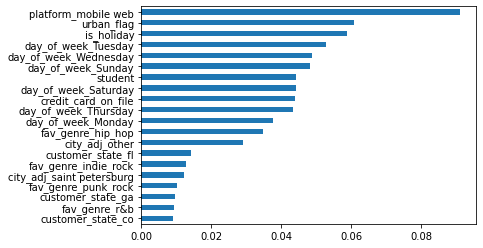

In [24]:
# Feature Importances
feat_importances = pd.Series(clf.feature_importances_, index=train.drop(Y_VAR, axis=1).columns)
feat_importances.sort_values()[-20:].plot(kind='barh')

In [25]:
# Web appears to be the most important
# followed by urban, lack of holiday, credit card on file, a few "other cities"

<AxesSubplot:title={'center':'fav_genre'}>

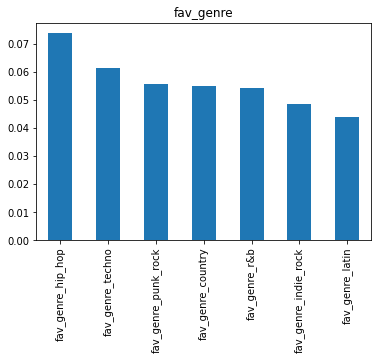

In [29]:
# Partial dependence plots
from pdpbox import pdp, info_plots

#country
pdp_iso = pdp.pdp_isolate(model=clf, 
                          dataset=train.drop(Y_VAR, axis=1),      
                          model_features=list(train.drop(Y_VAR, axis=1)), 
                          feature=[x for x in train.columns if "fav_genre" in x], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='fav_genre')

<AxesSubplot:title={'center':'platform'}>

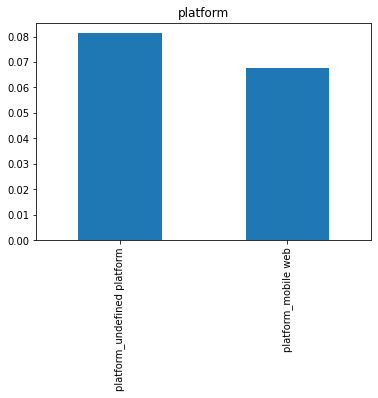

In [32]:
#country
pdp_iso = pdp.pdp_isolate(model=clf, 
                          dataset=train.drop(Y_VAR, axis=1),      
                          model_features=list(train.drop(Y_VAR, axis=1)), 
                          feature=[x for x in train.columns if "platform" in x], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='platform')

In [ ]:
# Conclusions:
# Ad works well for hip hop genre lovers, less so for other genres
# There IS a few segments that have good performance but low absolute count (techno). Marketing should go after more of these people
# High conversion but low abs count -> put this on a scatter plot. Go after these
# Users with already saved payments do much better. Go after existing user base more
# Fix the ads for low conversion segments. Especially if they have high count